In [113]:
import yfinance as yf
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt


In [114]:
data = yf.download('TATAELXSI.NS', start='2015-01-01')

[*********************100%***********************]  1 of 1 completed


In [115]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,TATAELXSI.NS,TATAELXSI.NS,TATAELXSI.NS,TATAELXSI.NS,TATAELXSI.NS
Date,,,,,
2015-01-01,268.657837,274.642849,265.209227,265.654209,967918
2015-01-02,269.748077,273.619426,268.769112,270.282061,392930
2015-01-05,274.620636,277.868999,267.656657,267.656657,957658
2015-01-06,276.222504,283.008477,270.104003,274.820800,1948022
2015-01-07,289.571960,295.868465,275.443786,275.488273,2355204


In [116]:
data.tail()

Price,Close,High,Low,Open,Volume
Ticker,TATAELXSI.NS,TATAELXSI.NS,TATAELXSI.NS,TATAELXSI.NS,TATAELXSI.NS
Date,,,,,
2025-07-29,6090.5,6106.5,5977.5,6009.5,108186
2025-07-30,6101.0,6169.5,6062.0,6070.0,95734
2025-07-31,6093.5,6138.5,6001.0,6084.0,138299
2025-08-01,6054.5,6087.5,6021.0,6087.5,126921
2025-08-04,6031.0,6078.0,5973.0,6022.0,145322


In [117]:
data.shape

(2615, 5)

In [118]:
data.describe()

Price,Close,High,Low,Open,Volume
Ticker,TATAELXSI.NS,TATAELXSI.NS,TATAELXSI.NS,TATAELXSI.NS,TATAELXSI.NS
count,2615.000000,2615.000000,2615.000000,2615.000000,2.615000e+03
mean,3252.852806,3304.258899,3209.914524,3258.586984,6.432177e+05
std,2955.326194,2998.798234,2921.223911,2962.519006,8.265697e+05
min,268.657837,273.619426,265.209227,265.654209,0.000000e+00
25%,796.393616,807.829982,782.523612,797.419714,1.850635e+05
50%,1107.288452,1128.541552,1088.432484,1110.146609,4.082980e+05
75%,6410.150879,6502.831254,6347.869350,6432.456978,7.704035e+05
max,10381.993164,10454.963768,10263.547727,10385.004081,9.837934e+06


In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2615 entries, 2015-01-01 to 2025-08-04
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (Close, TATAELXSI.NS)   2615 non-null   float64
 1   (High, TATAELXSI.NS)    2615 non-null   float64
 2   (Low, TATAELXSI.NS)     2615 non-null   float64
 3   (Open, TATAELXSI.NS)    2615 non-null   float64
 4   (Volume, TATAELXSI.NS)  2615 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 122.6 KB


In [120]:
data.isnull().sum()

Price   Ticker      
Close   TATAELXSI.NS    0
High    TATAELXSI.NS    0
Low     TATAELXSI.NS    0
Open    TATAELXSI.NS    0
Volume  TATAELXSI.NS    0
dtype: int64

In [121]:
data.duplicated().sum()

0

In [122]:
data.columns

MultiIndex([( 'Close', 'TATAELXSI.NS'),
            (  'High', 'TATAELXSI.NS'),
            (   'Low', 'TATAELXSI.NS'),
            (  'Open', 'TATAELXSI.NS'),
            ('Volume', 'TATAELXSI.NS')],
           names=['Price', 'Ticker'])

In [123]:
data= data[['Close']].dropna().reset_index()
data.columns = ['ds', 'y']

In [124]:
# Fit Prophet
model = Prophet()
model.fit(data)


16:11:59 - cmdstanpy - INFO - Chain [1] start processing
16:11:59 - cmdstanpy - INFO - Chain [1] done processing


In [125]:
 #Forecast next 365 days
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

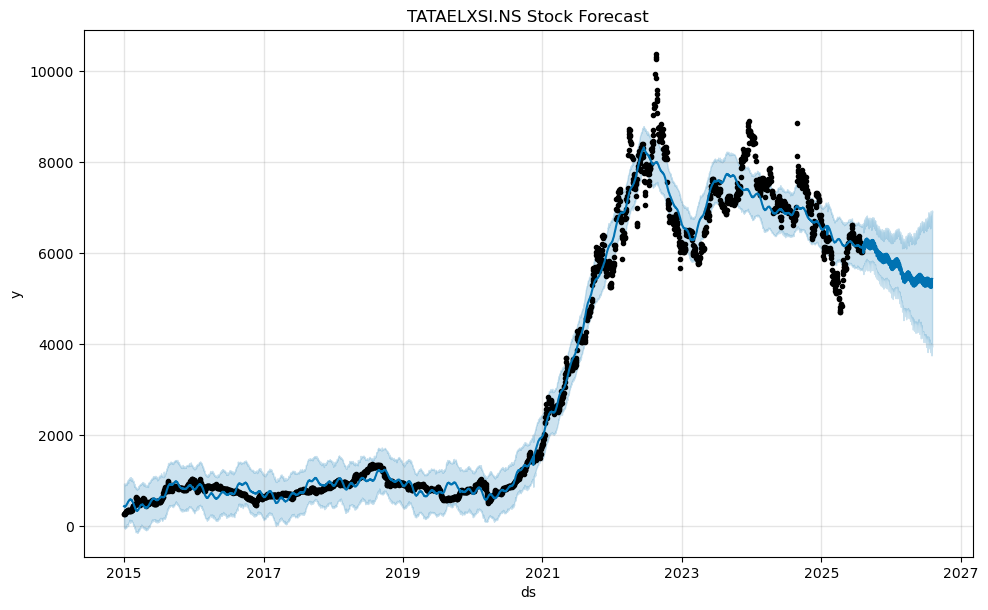

In [126]:
# Plot
model.plot(forecast)
plt.title('TATAELXSI.NS Stock Forecast')
plt.show()

ARIMA Forecasting (using Statsmodels)

In [127]:
import yfinance as yf
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

In [128]:
# Download data
data = yf.download('TATAELXSI.NS', start='2015-01-01', end='2025-06-06')
data = data[['Close']].dropna()


[*********************100%***********************]  1 of 1 completed


In [129]:
# Fit ARIMA model
model = ARIMA(data['Close'], order=(7,2,3))
model_fit = model.fit()


c:\Users\jeshw\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\jeshw\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\jeshw\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\jeshw\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [130]:
# Forecast next 30 days
forecast = model_fit.forecast(steps=30)

c:\Users\jeshw\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\jeshw\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


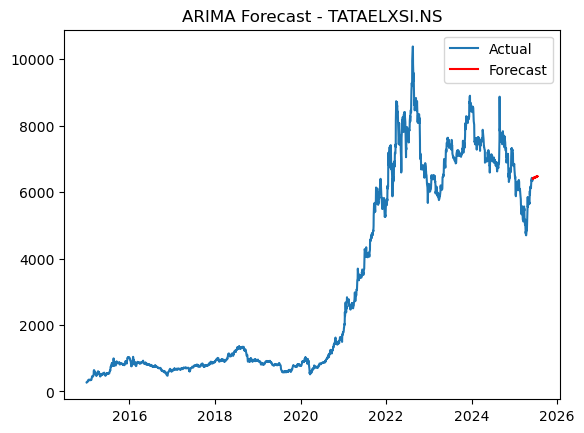

In [131]:
# Plot actual and forecast
plt.plot(data['Close'], label='Actual')
plt.plot(pd.date_range(start=data.index[-1], periods=31, freq='B')[1:], forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast - TATAELXSI.NS')
plt.legend()
plt.show()

SARIMA Forecasting (with Seasonality)

In [132]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [133]:
# Download data
data = yf.download('TATAELXSI.NS', start='2015-01-01', end='2025-06-06')
data = data[['Close']].dropna()

[*********************100%***********************]  1 of 1 completed


In [134]:
# Fit SARIMA model (order can be tuned)
model = SARIMAX(data['Close'], order=(1,1,1), seasonal_order=(1,1,1,12))
model_fit = model.fit(disp=False)


c:\Users\jeshw\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\jeshw\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [135]:
# Forecast
forecast = model_fit.get_forecast(steps=30)
forecast_ci = forecast.conf_int()

c:\Users\jeshw\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\jeshw\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


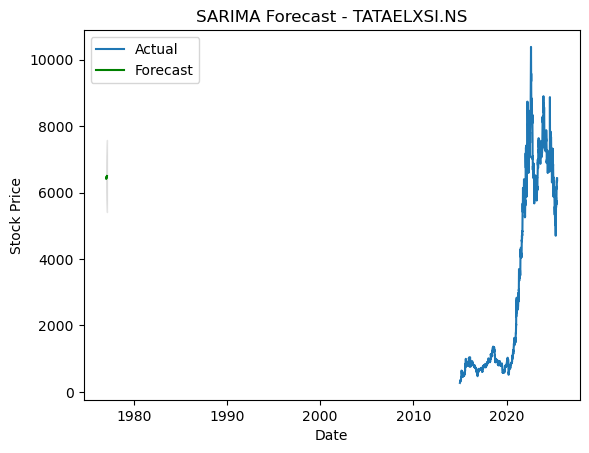

In [136]:
# Plot actual vs forecast
plt.plot(data['Close'], label='Actual')
forecast.predicted_mean.plot(label='Forecast', color='green')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='gray', alpha=0.2)
plt.title('SARIMA Forecast - TATAELXSI.NS')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

Prophet Forecasting (by Facebook/Meta)

In [137]:
from prophet import Prophet

In [138]:
# Create the Prophet-ready DataFrame
df = pd.DataFrame({
    'ds': data.index,  # Assuming Date is the index
    'y': data[('Close', 'TATAELXSI.NS')]
})

In [139]:
# Reset index if needed
df['ds'] = pd.to_datetime(df['ds'])


In [140]:
# Initialize and fit Prophet
model = Prophet()
model.fit(df)



16:12:17 - cmdstanpy - INFO - Chain [1] start processing
16:12:18 - cmdstanpy - INFO - Chain [1] done processing


In [141]:
 #Make future dataframe
future = model.make_future_dataframe(periods=30)


In [142]:
# Predict
forecast = model.predict(future)


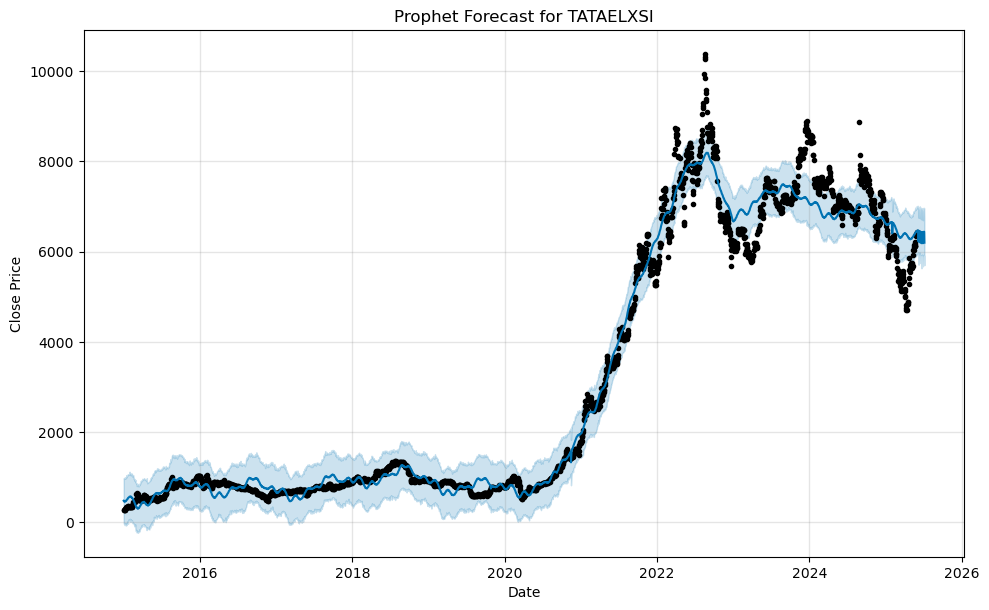

In [143]:
# Plot the results
model.plot(forecast)
plt.title('Prophet Forecast for TATAELXSI')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

LSTM Forecasting (using TensorFlow/Keras)

In [144]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import numpy as np


In [145]:
# Step 1: Load data
data = yf.download('TATAELXSI.NS', start='2015-01-01', end='2025-06-06')
data = data[['Close']]


[*********************100%***********************]  1 of 1 completed


In [146]:
df = data.reset_index()[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})


In [147]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data[['Close']].values.reshape(-1,1))


In [148]:
train_size = int(len(scaled_data) * 0.8)
train, test = scaled_data[:train_size], scaled_data[train_size:]


In [149]:
def create_dataset(dataset, time_step=60):
    X, Y = [], []
    for i in range(len(dataset)-time_step-1):
        X.append(dataset[i:(i+time_step), 0])
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)



In [150]:
# Define time_step BEFORE using it
time_step = 60

# Create datasets
X_train, y_train = create_dataset(train, time_step)
X_test, y_test = create_dataset(test, time_step)

# Reshape inputs for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test  = X_test.reshape(X_test.shape[0],  X_test.shape[1], 1)

In [151]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')


c:\Users\jeshw\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [160]:
model.fit(X_train, y_train, epochs=18, batch_size=32)


Epoch 1/18
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.0780e-04
Epoch 2/18
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.2010e-04
Epoch 3/18
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.5735e-04
Epoch 4/18
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.0262e-04
Epoch 5/18
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.4391e-04
Epoch 6/18
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.7792e-04
Epoch 7/18
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 2.4579e-04
Epoch 8/18
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 1.9502e-04
Epoch 9/18
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 1.9276e-04
Epoch 10/18
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 2.0437e-04
Epoch 11/18
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 2.0452e-04
Epoch 12/18
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 2.0571e-04
Epoch 13/18
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 2.0464e-04
Epoch 14/18
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 1.6635e-04
Epoch 15/18
63/

In [153]:
train_predict = model.predict(X_train)
test_predict  = model.predict(X_test)


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [154]:
train_predict = scaler.inverse_transform(train_predict)
test_predict  = scaler.inverse_transform(test_predict)


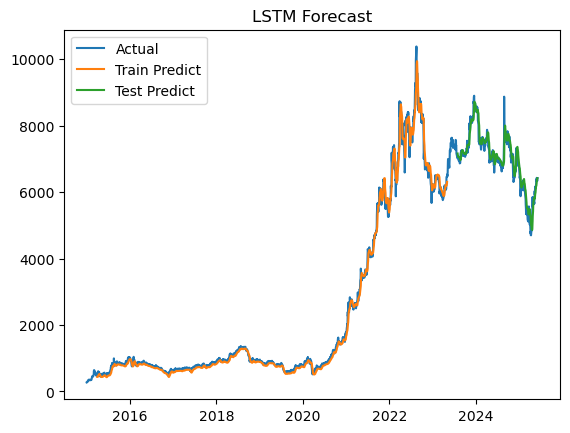

In [155]:
plt.plot(data.index, data['Close'], label='Actual')
plt.plot(data.index[time_step:len(train_predict)+time_step], train_predict, label='Train Predict')
plt.plot(data.index[len(train_predict)+(time_step*2)+1:len(data)-1], test_predict, label='Test Predict')
plt.title('LSTM Forecast')
plt.legend()
plt.show()


In [156]:
# Install these once before running:
# pip install pandas numpy matplotlib seaborn plotly scikit-learn statsmodels prophet tensorflow streamlit

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import streamlit as st


In [157]:
# Step 1: Load data
data = yf.download('TATAELXSI.NS', start='2015-01-01', end='2025-06-06')


[*********************100%***********************]  1 of 1 completed


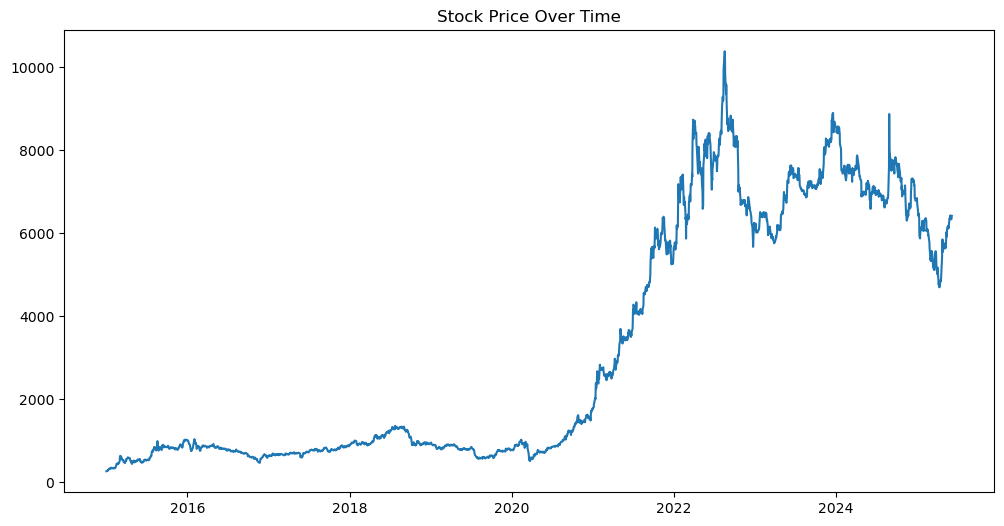

In [158]:
# 📊 Visualize Trends
plt.figure(figsize=(12,6))
plt.plot(data['Close'])
plt.title('Stock Price Over Time')
plt.show()


In [161]:
# ARIMA Forecasting
model_arima = ARIMA(data['Close'], order=(5,1,0))
result_arima = model_arima.fit()
forecast_arima = result_arima.forecast(steps=30)

# Calculate RMSE for ARIMA
rmse_arima = np.sqrt(mean_squared_error(data['Close'][-30:], forecast_arima)) # Calculate RMSE for the last 30 data points


# SARIMA Forecasting
model_sarima = SARIMAX(data['Close'], order=(1,1,1), seasonal_order=(1,1,0,12))
result_sarima = model_sarima.fit()
forecast_sarima = result_sarima.forecast(30)

# Calculate RMSE for SARIMA
rmse_sarima = np.sqrt(mean_squared_error(data['Close'][-30:], forecast_sarima)) # Calculate RMSE for the last 30 data points

# Prophet Forecasting
prophet_df = data.reset_index()[['Date', 'Close']]
prophet_df.columns = ['ds', 'y']
model_prophet = Prophet()
model_prophet.fit(prophet_df)
future = model_prophet.make_future_dataframe(periods=30)
forecast_prophet = model_prophet.predict(future)

# Calculate RMSE for Prophet
rmse_prophet = np.sqrt(mean_squared_error(data['Close'][-30:], forecast_prophet['yhat'][-30:]))  # Calculate RMSE for the last 30 data points

# LSTM Forecasting
scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler.fit_transform(data[['Close']])

X, y = [], []
for i in range(60, len(data_scaled)):
    X.append(data_scaled[i-60:i, 0])
    y.append(data_scaled[i, 0])

X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model_lstm.add(LSTM(units=50))
model_lstm.add(Dense(1))

model_lstm.compile(loss='mean_squared_error', optimizer='adam')
model_lstm.fit(X, y, epochs=20, batch_size=32)

# Make predictions for LSTM
# Define scaled_data here, before it's used
scaled_data = scaler.fit_transform(data[['Close']].values)  # Reshape if necessary
train_size = int(len(scaled_data) * 0.8)
train, test = scaled_data[:train_size], scaled_data[train_size:]


def create_dataset(dataset, time_step=60):
    X, Y = [], []
    for i in range(len(dataset)-time_step-1):
        X.append(dataset[i:(i+time_step), 0])
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 60
_, X_test = create_dataset(test, time_step) # Recalculate X_test
# The original line causing the error:
# X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Reshape X_test to 3D, but with only one feature
X_test = X_test.reshape(X_test.shape[0], 1, 1)


inputs = data_scaled[len(data_scaled) - len(X_test) - 60:]
inputs = inputs.reshape(-1, 1)
inputs = scaler.transform(inputs)
X_test_lstm = []
for i in range(60, inputs.shape[0]):
    X_test_lstm.append(inputs[i - 60:i, 0])
X_test_lstm = np.array(X_test_lstm)
X_test_lstm = np.reshape(X_test_lstm, (X_test_lstm.shape[0], X_test_lstm.shape[1], 1))

lstm_predictions = model_lstm.predict(X_test_lstm)
lstm_predictions = scaler.inverse_transform(lstm_predictions)


# Calculate RMSE for LSTM
rmse_lstm = np.sqrt(mean_squared_error(data['Close'][-30:], lstm_predictions[-30:]))  # Calculate RMSE for the last 30 data points


c:\Users\jeshw\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\jeshw\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\jeshw\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\jeshw\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\U

Epoch 1/20


c:\Users\jeshw\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 0.0216
Epoch 2/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 7.9011e-04
Epoch 3/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 6.6972e-04
Epoch 4/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 5.8830e-04
Epoch 5/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 5.0276e-04
Epoch 6/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 5.0154e-04
Epoch 7/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 5.1076e-04
Epoch 8/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 4.3013e-04
Epoch 9/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 4.4226e-04
Epoch 10/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 3.0748e-04
Epoch 11/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 3.4248e-04
Epoch 12/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 3.3564e-04
Epoch 13/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 2.9230e-04
Epoch 14/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 2.9111e-04
Epoch 15/20
79/79 ━━━━━━━━━━━━